<a href="https://colab.research.google.com/github/someshwarthumma/CancerDetection/blob/master/BreastCancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [5]:
from google.colab import files
uploaded = files.upload()

Saving cancer2.csv to cancer2.csv


In [0]:
colnames=['Id','Clump Thickness','Cell Size','Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
dataset = pd.read_csv('cancer2.csv',names=colnames)

In [94]:
dataset.head()

,Id,Clump Thickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [95]:
print("Cancer data set dimensions : {}".format(dataset.shape))

Cancer data set dimensions : (699, 11)


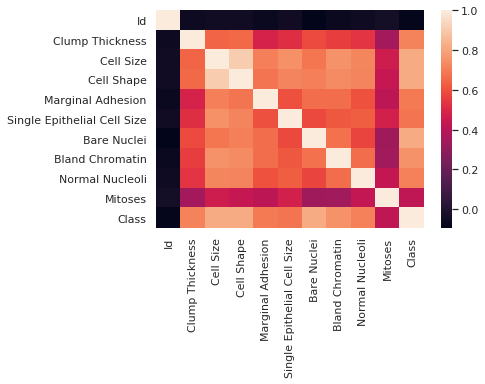

In [96]:
import seaborn as sns; sns.set()
corr = dataset.corr()
ax = sns.heatmap(corr)

From the above correlation plot, for the class variable is dependent on all the features of the data set but less on the Mitoses. So try to remove the feature and perform the analysis.

In [97]:
dataset.groupby('Class').size()

Class
2    458
4    241
dtype: int64

In [0]:
dataset=dataset.drop(['Mitoses'], axis=1)

In [0]:
X = dataset.iloc[:, 1:9].values
Y = dataset.iloc[:, 9].values

In [101]:
dataset.head()

,Id,Clump Thickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Class
0,1000025,5,1,1,1,2,1,3,1,2
1,1002945,5,4,4,5,7,10,3,2,2
2,1015425,3,1,1,1,2,2,3,1,2
3,1016277,6,8,8,1,3,4,3,7,2
4,1017023,4,1,1,3,2,1,3,1,2


Class
2    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
4    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

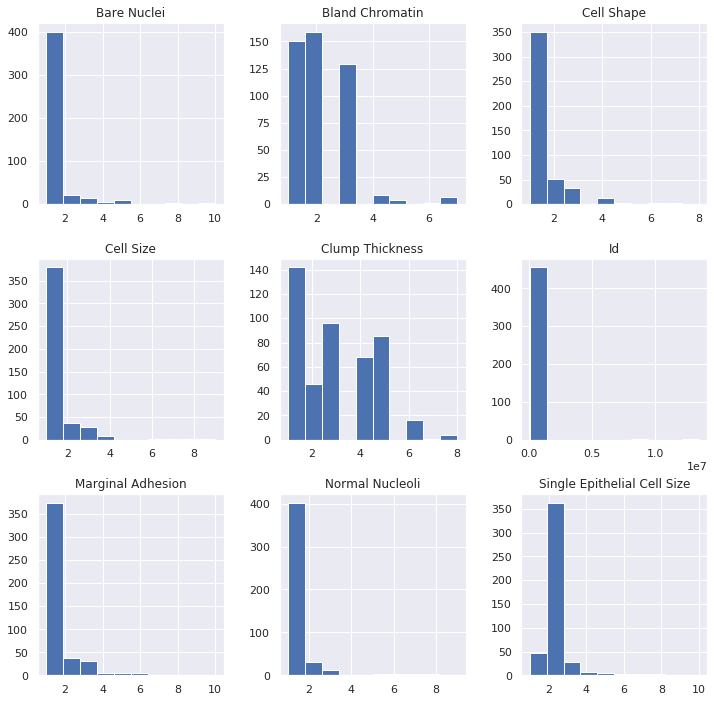

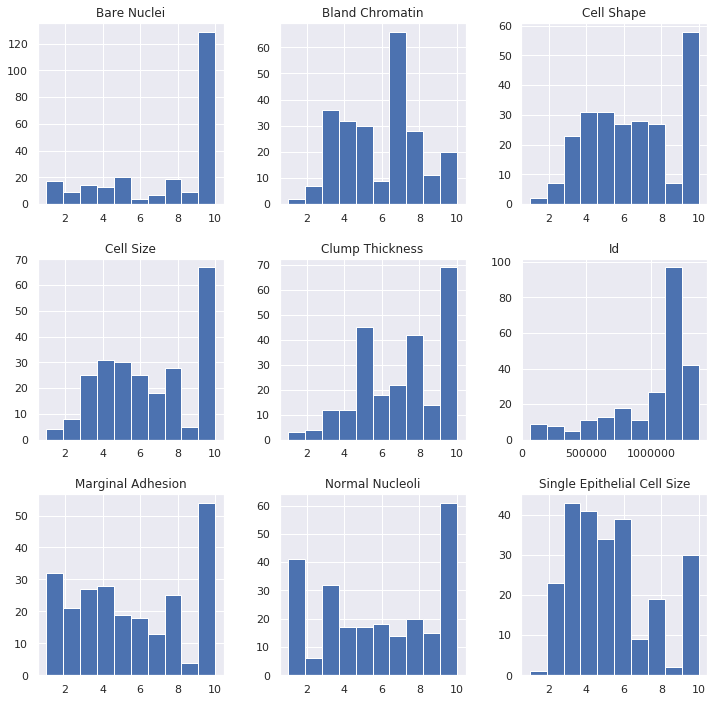

In [102]:
#Visualization of data
dataset.groupby('Class').hist(figsize=(12, 12))

In [103]:
dataset.isnull().sum()
dataset.isna().sum()

Id                             0
Clump Thickness                0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Class                          0
dtype: int64

In [0]:
#Encoding categorical data values 
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

All fine till now....

In [0]:
#Split the data into train and test without shuffling. this may result to the abnormal behavoir from the model.
#Perform the splitting with shuffling as shown in the below step with the help of sklearn model selection library.
#train_pct_index = int(0.75 * len(X))
#X_train, X_test = X[:train_pct_index], X[train_pct_index:]
#Y_train, Y_test = Y[:train_pct_index], Y[train_pct_index:]

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [0]:
#Feature Scaling, optional -> for normalising the features. As our features in the data are in the same range(1,10). So, we dont need feature scaling.
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [124]:
#Fitting the Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
Y_pred = classifier.predict(X_test)
Y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [126]:
X_test

array([[4, 1, 2, ..., 1, 1, 1],
       [4, 2, 2, ..., 1, 2, 1],
       [6, 6, 6, ..., 1, 7, 8],
       ...,
       [5, 3, 2, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 3, 1],
       [4, 1, 1, ..., 2, 3, 2]])

In [127]:
#Creating the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[109,   3],
       [  4,  59]])

In [128]:
"Accuracy: ",(cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])

('Accuracy: ', 0.96)

In [117]:
#Same as above,
cm

array([[109,   3],
       [  4,  59]])

In [121]:
"Accuracy:",(109+59)/(109+59+3+4)

('Accuracy:', 0.96)

In [120]:
x = np.array([4, 1, 2, 9, 2, 0, 0, 1])
classifier.predict(x.reshape(1,-1))


array([0])